In [0]:
!pip install --upgrade wandb
# ! wandb login 


# Import everything and initialize time formatting
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D, Conv2D
from keras.utils import np_utils
# import wandb
# from wandb.keras import WandbCallback
import os
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

pacific_timezone = pytz.timezone("US/Pacific")
utc_timezone = pytz.timezone("UTC")
  


     |████████████████████████████████| 1.4MB 3.5MB/s 
     |████████████████████████████████| 112kB 55.7MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 460kB 49.2MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=cb1a1542baad5e187ecce7500589d106a456a3b1a19e85c798cb65058f857b21
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=f22ffb18382f271e46c3c612caa6a1287542d71a3142922142dff600811aebea
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=1d

Using TensorFlow backend.


In [0]:
def draw_digit(digit, label=None):
  # Make those columns into a array of 8-bits pixels
  # This array will be of 1D with length 784
  # The pixel intensity values are integers from 0 to 255
  pixels = np.array(digit * 255, dtype='uint8')

  # Reshape the array into 28 x 28 array (2-dimensional array)
  pixels = pixels.reshape((28, 28))

  # Plot
  if label is not None:
    plt.title('Label is {label}'.format(label=label))
  plt.imshow(pixels, cmap='gray')
  plt.show()
  

In [0]:
def ascii_draw_digit(digit):
  str = ""
  for i in range(digit.shape[0]):
      for j in range(digit.shape[1]):
          if digit[i][j] == 0:
              str += " "
          elif digit[i][j] < 128:
              str += "."
          else:
              str += "X"
      str += "\n"

  print(str)

In [0]:
# current_time = utc_timezone.localize(datetime.now()).astimezone(pacific_timezone).strftime("%H:%M:%S")
# run = wandb.init(project="fashion-mnist", group="Ryan", name="Ryan - "+current_time)

# logging code
config = run.config

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# normalize data
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

# get image shapes
img_width = X_train.shape[1]
img_height = X_train.shape[2]

# reshape data
X_train  = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test  = X_test.reshape(X_test.shape[0], img_width, img_height, 1)


# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]


4423680/4422102 [==============================] - 1s 0us/step


In [0]:
def create_model():
  # create model
  model=Sequential()
  model.add(Conv2D(32,
                  (4, 4),
            input_shape=(img_width, img_height, 1),
            activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.4))
  model.add(Conv2D(32,
                  (4, 4),
            input_shape=(img_width, img_height, 1),
            activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(rate=0.4))
  model.add(Flatten(input_shape=(img_width,img_height)))
  model.add(Dense(2 * num_classes, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
 
  # # Log metrics with wandb
  # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[WandbCallback()]) 
 
  # # Save model to wandb
  # model.save(os.path.join(wandb.run.dir, "model.h5"))
 
  return model

In [0]:
model = create_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[WandbCallback()])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 59s 987us/step - loss: 0.6901 - acc: 0.7419 - val_loss: 0.4874 - val_acc: 0.8293
Epoch 2/10
60000/60000 [==============================] - 58s 960us/step - loss: 0.4843 - acc: 0.8231 - val_loss: 0.4142 - val_acc: 0.8511
Epoch 3/10
60000/60000 [==============================] - 57s 952us/step - loss: 0.4312 - acc: 0.8421 - val_loss: 0.3799 - val_acc: 0.8612
Epoch 4/10
60000/60000 [==============================] - 57s 945us/step - loss: 0.4037 - acc: 0.8511 - val_loss: 0.3593 - val_acc: 0.8680
Epoch 5/10
60000/60000 [==============================] - 56s 931us/step - loss: 0.3843 - acc: 0.8572 - val_loss: 0.3369 - val_acc: 0.8778
Epoch 6/10
60000/60000 [=======

Percentage Correct: 88.9%


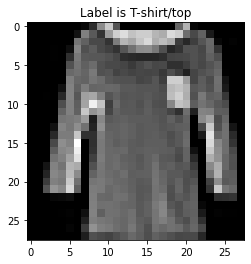

T-shirt/top: 51.379%
Trouser: 0.0%
Pullover: 36.112%
Dress: 1.484%
Coat: 0.071%
Sandal: 0.0%
Shirt: 10.942%
Sneaker: 0.0%
Bag: 0.008%
Ankle boot: 0.0%
We know it is a : Pullover


In [0]:
predictions = model.predict(X_test)
corrects = []
incorrects = []
for i in range(len(predictions)):
  if np.argmax(predictions[i]) == np.argmax(y_test[i]):
    corrects.append(i)
  else:
    incorrects.append(i)
  
print(f"Percentage Correct: {int(len(corrects) / (len(corrects)+len(incorrects)) * 100000) / 1000.0}%" )

index = 420
digit = X_test[incorrects[index]]
prediction = model.predict([[digit]])
actual = np.array(y_test[incorrects[index]])
categories = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
prediction_category = categories[np.argmax(prediction)]
draw_digit(digit, prediction_category)
print('\n'.join([f'{categories[i]}: {int(prediction[0][i] * 100000) / 1000.0}%' for i in range(len(prediction[0]))]))
print(f"We know it is a : {categories[np.argmax(actual)]}")

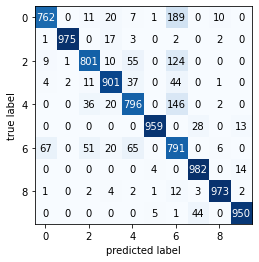

In [0]:
#Confusion Matrix 

predictions = model.predict([X_test])
mod_preds = []
mod_actual = []
for i in range(len(predictions)):
  new_pred = np.argmax(predictions[i])
  new_act = np.argmax(y_test[i])
  mod_preds.append(new_pred)
  mod_actual.append(new_act)

# print (mod_preds)
# print(mod_actual)
cm = confusion_matrix(mod_actual, mod_preds)
fig, ax = plot_confusion_matrix(conf_mat = cm)
plt.show()